In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./introduction.ipynb'))))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from itertools import product
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

from ylearn.exp_dataset.exp_data import single_continuous_treatment, single_binary_treatment, multi_continuous_treatment
from ylearn.estimator_model.double_ml import DML4CATE

## Single continuous treatment.
Valid estimation models include
- DoubleML
- DeepIV
- CausalTree

### The dataset is generated by the following process [1]
Below we use the einstein notation to alleviate the headaches of specifiying dimensions of tensors.
\begin{align*}
    x & = \beta_i w^i \\
    y & = x \theta(v^i) + \gamma_j w^j + \epsilon \\
    w & \sim \text{Normal}(0, I_{n_w})\\
    v & \sim \text{Uniform}(0, 1)^{n_v}
\end{align*}

In [3]:
train, val, treatment_effect = single_continuous_treatment()

adjustment = train.columns[:-4]
covariate = 'c_0'
outcome = 'outcome'
treatment = 'treatment'

def exp_te(x): return np.exp(2*x)
dat = np.array(list(product(np.arange(0, 1, 0.01), repeat=1))).ravel()
data_test = pd.DataFrame({'c_0': dat})
true_te = np.array([exp_te(xi) for xi in data_test[covariate]])

In [4]:
adjustment = train.columns[:-4]
covariate = 'c_0'
outcome = 'outcome'
treatment = 'treatment'

In [5]:
dml = DML4CATE(
    x_model=RandomForestRegressor(),
    y_model=RandomForestRegressor(),
    cf_fold=1,
    covariate_transformer = PolynomialFeatures(degree=3,include_bias=False)
)
dml.fit(
    train,
    outcome,
    treatment,
    adjustment,
    covariate, 
)

05-20 17:35:32 I ylearn.e.double_ml.py 613 - _fit_1st_stage: fitting x_model RandomForestRegressor
05-20 17:35:34 I ylearn.e.double_ml.py 619 - _fit_1st_stage: fitting y_model RandomForestRegressor
05-20 17:35:36 I ylearn.e.double_ml.py 643 - _fit_2nd_stage: fitting yx_model LinearRegression


Double Machine Learning Estimator

In [7]:
from ylearn.effect_interpreter.ce_interpreter import CEInterpreter

In [16]:
cei = CEInterpreter(max_depth=2,)
cei.fit(data=data_test, est_model=dml)

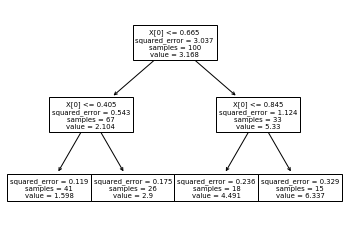

In [18]:
from sklearn import tree
tree.plot_tree(cei._tree, max_depth=2)
plt.show()